In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

# Read cars dataset
See: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
and: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [2]:
columns = [
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price'
]
cars = pd.read_csv('imports-85.data', names=columns)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
features = [
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
]
target = cars['price']

# Data Cleanup
- Remove columns with many missing values
- Remove rows with remaining missing values

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [5]:
len(cars[cars['normalized-losses'] == '?'])

41

In [6]:
# remove 'normalized-losess' entirely since 41 of 205 rows have missing data
cars = cars.drop('normalized-losses', axis=1)
cars.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# replace ? character with NaN so we can use dropna() later
cars = cars.replace('?', np.nan)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-nul

In [8]:
# remove rows with null values
cars = cars.dropna()
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
symboling            193 non-null int64
make                 193 non-null object
fuel-type            193 non-null object
aspiration           193 non-null object
num-of-doors         193 non-null object
body-style           193 non-null object
drive-wheels         193 non-null object
engine-location      193 non-null object
wheel-base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb-weight          193 non-null int64
engine-type          193 non-null object
num-of-cylinders     193 non-null object
engine-size          193 non-null int64
fuel-system          193 non-null object
bore                 193 non-null object
stroke               193 non-null object
compression-ratio    193 non-null float64
horsepower           193 non-null object
peak-rpm             193 non-nul

In [9]:
# remove columns other than features and target
cars = cars[features + ['price']]
cars.head()

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 13 columns):
wheel-base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb-weight          193 non-null int64
bore                 193 non-null object
stroke               193 non-null object
compression-ratio    193 non-null float64
horsepower           193 non-null object
peak-rpm             193 non-null object
city-mpg             193 non-null int64
highway-mpg          193 non-null int64
price                193 non-null object
dtypes: float64(5), int64(3), object(5)
memory usage: 21.1+ KB


In [11]:
# convert all columns to float which is possible without ? characters
cars = cars.astype(np.float64)

cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 13 columns):
wheel-base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb-weight          193 non-null float64
bore                 193 non-null float64
stroke               193 non-null float64
compression-ratio    193 non-null float64
horsepower           193 non-null float64
peak-rpm             193 non-null float64
city-mpg             193 non-null float64
highway-mpg          193 non-null float64
price                193 non-null float64
dtypes: float64(13)
memory usage: 21.1 KB


In [12]:
# function to normalize all columns in a dataframe with values from 0 to 1
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

In [13]:
normalized_cars = normalize(cars[features])
normalized_cars.head()

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895


In [14]:
normalized_cars['price'] = cars['price']
normalized_cars.head()

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [15]:
cars = normalized_cars
cars.head()

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


# Model training

In [16]:
def knn_train_test(df, feature, target):
    if feature not in df.columns:
        raise ValueError('Column "%s" is not in dataframe' % feature)
    
    X = df[[feature]]
    y = df[target]
    
    knn = KNeighborsRegressor()
    kf = KFold(len(df),  n_folds=5, shuffle=True, random_state=42)
    
    mses = list()
    
    for train_index, test_index in kf:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        mse = mean_squared_error(predictions, y_test)
        mses.append(mse)
    
    avg_rmse = np.sqrt(np.mean(mses))
    return avg_rmse

In [17]:
knn_train_test(cars, 'wheel-base', 'price')

5957.1434554145726

In [18]:
best_feature = None
best_rmse = None

for feature in features:
    rmse = knn_train_test(cars, feature, 'price')
    if best_rmse is None or rmse < best_rmse:
        best_rmse = rmse
        best_feature = feature

print(best_feature, best_rmse)

city-mpg 3925.49996209


# Performance of Univariate KNN with k=5
The univariate model using the 'curb-weight' feature perfomed best, producing a RMSE of 3252 with a K Nearest Neighbors Regressor using a k value of 5.

# Varying k values

In [26]:
def knn_train_test(df, feature, target, k):
    if feature not in df.columns:
        raise ValueError('Column "%s" is not in dataframe' % feature)
    
    X = df[[feature]]
    y = df[target]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    kf = KFold(len(df),  n_folds=5, shuffle=True, random_state=42)
    
    mses = list()
    
    for train_index, test_index in kf:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        mse = mean_squared_error(predictions, y_test)
        mses.append(mse)
    
    avg_rmse = np.sqrt(np.mean(mses))
    return avg_rmse

In [30]:
# determine the best univariate feature with a variety of k values

# tracking vars
best_feature = None
best_rmse = None
best_k = None

# keep track of this so we can use them in multivariate models later
univariate_k_rmses = list()

k_values = [1,3,5,7,9]

for k in k_values:
    for feature in features:
        rmse = knn_train_test(cars, feature, 'price', k)
        univariate_k_rmses.append((k, feature, rmse))
        if best_rmse is None or rmse < best_rmse:
            best_rmse = rmse
            best_feature = feature
            best_k = k

print(best_feature, best_rmse, best_k)

city-mpg 3925.49996209 5


# Performance of Univariate KNN with Varying k values
The univariate model using the 'curb-weight' feature perfomed best, producing a RMSE of 2982.7 with a K Nearest Neighbors Regressor using a k value of 3.

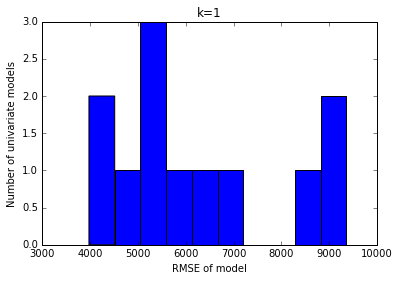

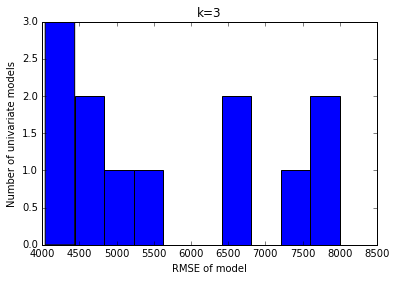

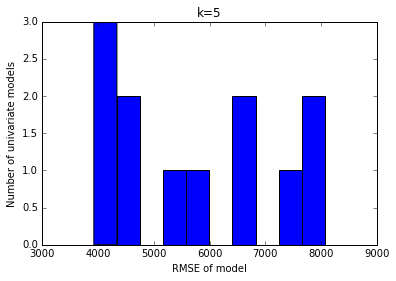

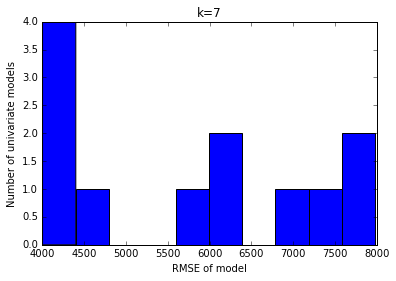

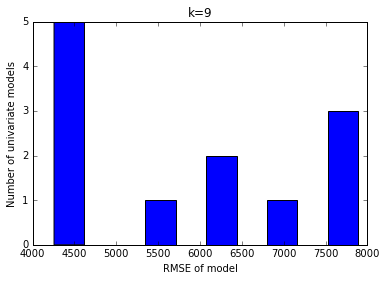

In [31]:
k_values = [1,3,5,7,9]

for k in k_values:
    rmses = list()
    for feature in features:
        rmse = knn_train_test(cars, feature, 'price', k)
        rmses.append(rmse)

    plt.hist(rmses)
    plt.title("k=%s" % k)
    plt.xlabel("RMSE of model")
    plt.ylabel("Number of univariate models")
    plt.show()

# Multivariate model

In [32]:
def knn_train_test(df, features, target, k):
    for feature in features:
        if feature not in df.columns:
            raise ValueError('Column "%s" is not in dataframe' % feature)
    
    X = df[features]
    y = df[target]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    kf = KFold(len(df),  n_folds=5, shuffle=True, random_state=42)
    
    mses = list()
    
    for train_index, test_index in kf:
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        mse = mean_squared_error(predictions, y_test)
        mses.append(mse)
    
    avg_rmse = np.sqrt(np.mean(mses))
    return avg_rmse

In [33]:
# multivariate model trained on all features

best_rmse = None
best_k = None

k_values = [1,3,5,7,9]

for k in k_values:
    rmse = knn_train_test(cars, features, 'price', k)
    if best_rmse is None or rmse < best_rmse:
        best_rmse = rmse
        best_k = k

print(best_rmse, best_k)

3230.46901242 1


In [40]:
# load the rmse scores from the univariate step above into a dataframe 
# so we can determine best features for multivariate models

uni = pd.DataFrame(univariate_k_rmses, columns=['k', 'feature', 'rmse'])
uni = uni.sort_values('rmse')
uni.head(10)

,k,feature,rmse
34,5,city-mpg,3925.499962
8,1,horsepower,3977.503944
46,7,city-mpg,4004.223043
32,5,horsepower,4022.544413
20,3,horsepower,4040.334193
14,3,width,4144.785517
22,3,city-mpg,4177.470415
44,7,horsepower,4191.813046
40,7,curb-weight,4253.809825
59,9,highway-mpg,4256.327442


In [42]:
# unique() preserves sorting
uni["feature"].unique()

array(['city-mpg', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'wheel-base', 'length', 'compression-ratio', 'bore', 'peak-rpm',
       'stroke', 'height'], dtype=object)

In [44]:
# best n features can be derived from sorted feature column
best_2_features = list(uni["feature"].unique()[:2])
best_2_features

['city-mpg', 'horsepower']

In [45]:
# best n features can be derived from sorted feature column
best_3_features = list(uni["feature"].unique()[:3])
best_3_features

['city-mpg', 'horsepower', 'width']

In [46]:
# best n features can be derived from sorted feature column
best_4_features = list(uni["feature"].unique()[:4])
best_4_features

['city-mpg', 'horsepower', 'width', 'curb-weight']

In [47]:
# best n features can be derived from sorted feature column
best_5_features = list(uni["feature"].unique()[:5])
best_5_features

['city-mpg', 'horsepower', 'width', 'curb-weight', 'highway-mpg']

In [50]:
# determine best k values
uni["k"].unique()

array([5, 1, 7, 3, 9])

In [49]:
best_k = 5

In [51]:
# train and test multivariate models
best_2_rmse = knn_train_test(cars, best_2_features, 'price', best_k)
best_3_rmse = knn_train_test(cars, best_3_features, 'price', best_k)
best_4_rmse = knn_train_test(cars, best_4_features, 'price', best_k)
best_5_rmse = knn_train_test(cars, best_5_features, 'price', best_k)

In [52]:
print(best_2_rmse)
print(best_2_rmse)
print(best_3_rmse)
print(best_4_rmse)
print(best_5_rmse)

3795.75915871
3795.75915871
3188.45162613
3001.56369254
3059.47391516


# Hyperparameter tuning

In [54]:
# top 3 multivariate models using k=5:
top_multi_features = [best_4_features, best_5_features, best_3_features]

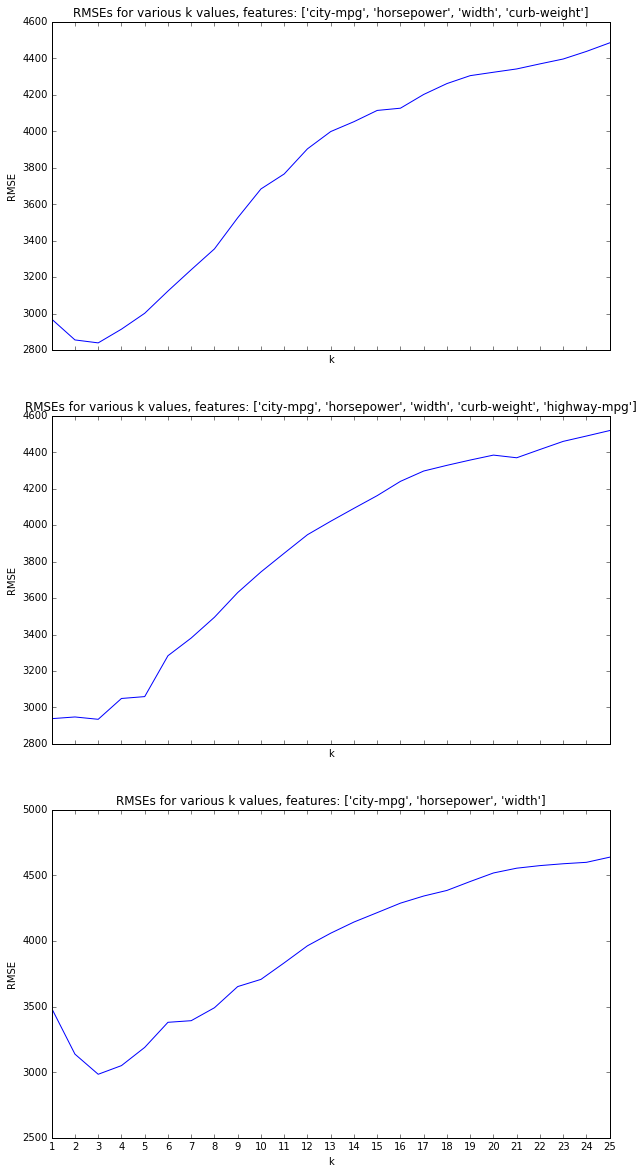

In [73]:
fig, axarr = plt.subplots(3, 1, sharex=True, figsize=(10,20))

for idx, multi_features in enumerate(top_multi_features):
    rmses = list()
    for k in range(1, 26):
        rmse = knn_train_test(cars, multi_features, 'price', k)
        rmses.append(rmse)
    ax = axarr[idx]
    ax.plot(range(1,26), rmses)
    ax.set_title('RMSEs for various k values, features: %s' % multi_features)
    ax.set_xticks(range(1,26))
    ax.set_xlabel('k')
    ax.set_ylabel('RMSE')

plt.show()